# Hide the message within the least significant bit (LSB) of the pixel values in the image.

    * Take an image of size M*N
    * Take a secret message of size MN (eg. 10101000011....................MN)
    * Embed the message in the last LSB of input image.
    * Show input and embedded image.
    * Extract message from embedded image.
    * Plot histogram of input image, embedded image and image obtained after message extraction.

Original Message (First 100 bits): 0000010011110110000001101101000100110111010000000100100101010001101101011001111101111110000010001001
Extracted Message (First 100 bits): 0000010011110110000001101101000100110111010000000100100101010001101101011001111101111110000010001001


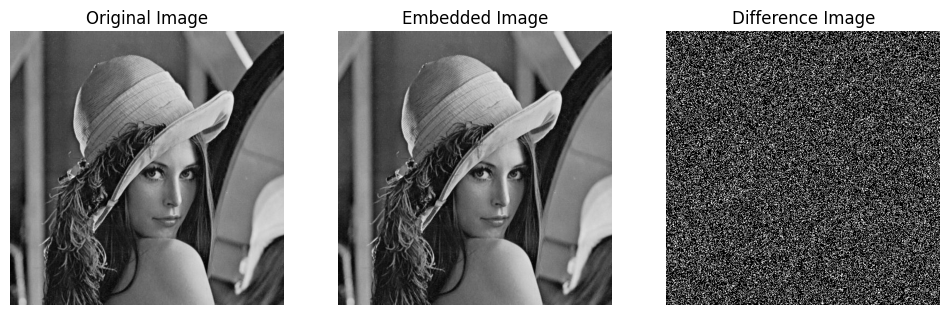

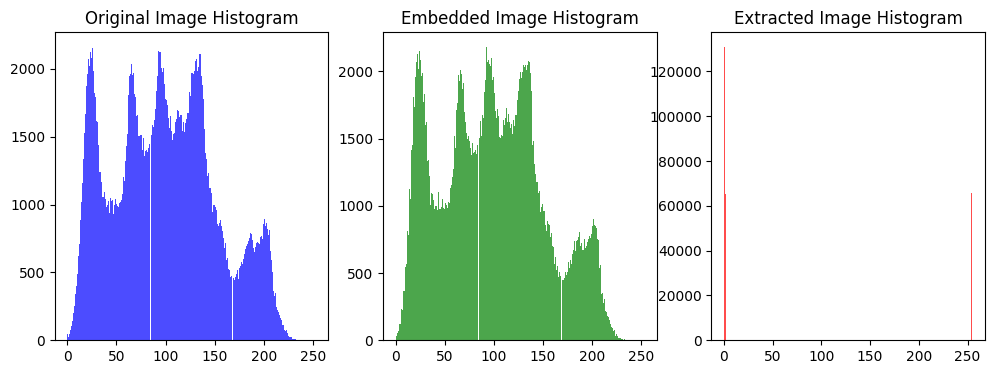

In [15]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

def read_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Error: Unable to read image at {image_path}")
    return img

def embed_message(image, message):
    flat_image = image.flatten()
    message = np.array([int(bit) for bit in message[:len(flat_image)]], dtype=np.uint8)
    embedded_flat = (flat_image & 0xFE) | message  # Modify LSB
    return embedded_flat.reshape(image.shape)

def extract_message(image):
    flat_image = image.flatten()
    extracted_bits = flat_image & 1  # Extract LSB
    return "".join(str(bit) for bit in extracted_bits)

def plot_histograms(original, embedded, extracted):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.hist(original.ravel(), bins=256, color='blue', alpha=0.7)
    plt.title("Original Image Histogram")

    plt.subplot(1, 3, 2)
    plt.hist(embedded.ravel(), bins=256, color='green', alpha=0.7)
    plt.title("Embedded Image Histogram")

    plt.subplot(1, 3, 3)
    plt.hist(extracted.ravel(), bins=256, color='red', alpha=0.7)
    plt.title("Extracted Image Histogram")

    plt.savefig(f"outimg_problem3_hist.png")
    plt.show()

def main():
    image_path = "../test_imgs/lena.jpg"
    image = read_image(image_path)
    message = np.random.choice([0, 1], size=image.size)
    message_str = "".join(str(bit) for bit in message)

    embedded_image = embed_message(image, message_str)
    extracted_message = extract_message(embedded_image)

    print("Original Message (First 100 bits):", message_str[:100])
    print("Extracted Message (First 100 bits):", extracted_message[:100])

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(embedded_image, cmap='gray')
    plt.title("Embedded Image")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(abs(image - embedded_image), cmap='gray')
    plt.title("Difference Image")
    plt.axis("off")
    plt.savefig(f"outimg_problem3.png")
    plt.show()

    plot_histograms(image, embedded_image, abs(image - embedded_image))

if __name__ == "__main__":
    main()
